In [120]:
import pandas as pd
import random
import numpy as np

In [121]:

# Definiamo le condizioni mediche possibili
conditions = ["disabilità cognitiva A", "disabilità cognitiva B", "disabilità cognitiva C", "disabilità motoria"]

# Creiamo il DataFrame
df = pd.DataFrame(conditions, columns=["condition"])

# Salviamo il DataFrame in un file CSV
df.to_csv("condition.csv", index_label="index")


In [122]:
# Carichiamo il file delle condizioni mediche
conditions_df = pd.read_csv("condition.csv")
import itertools

conditions = conditions_df["index"].tolist()

# Create a cycle object to cycle through the conditions
condition_cycle = itertools.cycle(conditions)

# Definiamo il numero di utenti (bambini)
num_users = 50

# Assign conditions to users in a balanced way
users_data = {
    "user_id": [i for i in range(num_users)],
    "condition_id": [next(condition_cycle) for _ in range(num_users)]
}

# shuffle the users by shuffling the indexes
np.random.shuffle(users_data["condition_id"])

"""# Generiamo i dati casuali per il file user.csv
users_data = {
    "user_id": [i for i in range(num_users)],
    "condition_id": [random.choice(conditions_df["index"]) for _ in range(num_users)]
}"""

# Creiamo il DataFrame per gli utenti
users_df = pd.DataFrame(users_data)

# Salviamo il DataFrame in un file CSV
users_df.to_csv("user.csv", index=False)

In [123]:

# Lista delle attività e dei relativi livelli di difficoltà
# activities = [
#     {"activity": "Disegno con matite colorate o pastelli", "difficulty": 0.3},
#     {"activity": "Colorare immagini stampate con varie sfumature di colori", "difficulty": 0.3},
#     {"activity": "Usare timbri per creare pattern e disegni", "difficulty": 0.3},
#     {"activity": "Completare puzzle con pezzi di dimensioni adatte", "difficulty": 0.4},
#     {"activity": "Classificare e ordinare forme geometriche e colori", "difficulty": 0.4},
#     {"activity": "Costruire strutture con blocchi di legno o plastica", "difficulty": 0.4},
#     {"activity": "Giocare con bambole o pupazzi, creando scenari e dialoghi", "difficulty": 0.5},
#     {"activity": "Fare finta di cucinare con giocattoli da cucina e cibo finto", "difficulty": 0.5},
#     {"activity": "Simulare situazioni quotidiane come fare la spesa o andare al dottore", "difficulty": 0.5},
#     {"activity": "Giocare con palloni da calcio o da basket", "difficulty": 0.6},
#     {"activity": "Guidare macchinine su piste o creare percorsi con ostacoli", "difficulty": 0.6},
#     {"activity": "Saltare su trampolini o fare giri in bicicletta", "difficulty": 0.6},
#     {"activity": "Creare opere d'arte con carta, colla e materiali riciclati", "difficulty": 0.7},
#     {"activity": "Realizzare sculture con pasta modellabile o plastilina", "difficulty": 0.7},
#     {"activity": "Dipingere con le dita o con spugne per esplorare diverse texture e tecniche", "difficulty": 0.7},
#     {"activity": "Associare immagini con parole corrispondenti", "difficulty": 0.8},
#     {"activity": "Ordinare oggetti in base a dimensione, colore o forma", "difficulty": 0.8},
#     {"activity": "Risolvere semplici problemi matematici utilizzando manipolativi", "difficulty": 0.8},
#     {"activity": "Esplorare diverse consistenze con giochi di sabbia, farina o gelatina", "difficulty": 0.9},
#     {"activity": "Scoprire nuovi odori e sapori attraverso attività di cucina o esperimenti sensoriali", "difficulty": 0.9},
#     {"activity": "Ascoltare e identificare suoni con strumenti musicali o registrazioni", "difficulty": 0.9},
#     {"activity": "Esplorare la natura e raccogliere oggetti come foglie, sassi o fiori", "difficulty": 1.0},
#     {"activity": "Giocare con acqua e sabbia in un tavolo sensoriale", "difficulty": 1.0},
#     {"activity": "Svolgere attività di coordinazione e equilibrio su scivoli o altalene", "difficulty": 1.0},
#     {"activity": "Costruire una torre con blocchi di legno", "difficulty": 0.3},
#     {"activity": "Giocare a nascondino con oggetti", "difficulty": 0.3},
#     {"activity": "Decorare una pagina con adesivi colorati", "difficulty": 0.3},
#     {"activity": "Incastrare forme nei rispettivi spazi di un puzzle", "difficulty": 0.4},
#     {"activity": "Creare un collage con carta e colla", "difficulty": 0.4},
#     {"activity": "Imparare i colori con carte didattiche", "difficulty": 0.4},
#     {"activity": "Giocare a fare la spesa con un carrello e oggetti finti", "difficulty": 0.5},
#     {"activity": "Organizzare una festa con pupazzi", "difficulty": 0.5},
#     {"activity": "Raccontare una storia usando figure e oggetti", "difficulty": 0.5},
#     {"activity": "Calciare una palla verso un obiettivo", "difficulty": 0.6},
#     {"activity": "Corsa a ostacoli", "difficulty": 0.6},
#     {"activity": "Giocare a tira e molla con una corda", "difficulty": 0.6},
#     {"activity": "Creare braccialetti con perline", "difficulty": 0.7},
#     {"activity": "Pittura su tela con pennelli", "difficulty": 0.7},
#     {"activity": "Costruzione di modelli semplici con argilla", "difficulty": 0.7},
#     {"activity": "Leggere una storia semplice con immagini", "difficulty": 0.8},
#     {"activity": "Costruire figure geometriche con bastoncini", "difficulty": 0.8},
#     {"activity": "Risoluzione di semplici puzzle numerici", "difficulty": 0.8},
#     {"activity": "Esplorazione di texture diverse con oggetti sensoriali", "difficulty": 0.9},
#     {"activity": "Esperimenti di miscelazione con colori alimentari e acqua", "difficulty": 0.9},
#     {"activity": "Ascolto e identificazione di versi di animali", "difficulty": 0.9},
#     {"activity": "Passeggiata nella natura con osservazione di piante e animali", "difficulty": 1.0},
#     {"activity": "Costruzione di castelli di sabbia", "difficulty": 1.0},
#     {"activity": "Percorso di equilibrio su travi e blocchi", "difficulty": 1.0},
#     {"activity": "Decorare biscotti con glasse colorate", "difficulty": 0.3},
#     {"activity": "Gioco del memory con carte illustrate", "difficulty": 0.3},
#     {"activity": "Incollare pezzi di carta su una sagoma", "difficulty": 0.3},
#     {"activity": "Montare e smontare giocattoli modulari", "difficulty": 0.4},
#     {"activity": "Realizzare figure con il pongo", "difficulty": 0.4},
#     {"activity": "Giocare a bingo con immagini", "difficulty": 0.4},
#     {"activity": "Giocare a 'indovina l'oggetto' con scatole sensoriali", "difficulty": 0.5},
#     {"activity": "Interpretare ruoli con maschere e costumi", "difficulty": 0.5},
#     {"activity": "Costruire case di cartone per pupazzi", "difficulty": 0.5},
#     {"activity": "Lanciare palline in un canestro", "difficulty": 0.6},
#     {"activity": "Gioco del bowling con bottiglie e palline", "difficulty": 0.6},
#     {"activity": "Saltare la corda", "difficulty": 0.6},
#     {"activity": "Realizzare un album fotografico con immagini ritagliate", "difficulty": 0.7},
#     {"activity": "Creazione di mosaici con tessere colorate", "difficulty": 0.7},
#     {"activity": "Stampare figure con stencil e colori", "difficulty": 0.7},
#     {"activity": "Scrivere e illustrare una breve storia", "difficulty": 0.8},
#     {"activity": "Costruzione di strutture con cannucce e connettori", "difficulty": 0.8},
#     {"activity": "Risoluzione di giochi di logica con immagini", "difficulty": 0.8},
#     {"activity": "Manipolare schiuma da barba o gelatina", "difficulty": 0.9},
#     {"activity": "Esperimenti con bicarbonato e aceto", "difficulty": 0.9},
#     {"activity": "Creazione di strumenti musicali con materiali riciclati", "difficulty": 0.9},
#     {"activity": "Osservazione di insetti con una lente di ingrandimento", "difficulty": 1.0},
#     {"activity": "Giocare con bolle di sapone all'aperto", "difficulty": 1.0},
#     {"activity": "Giochi di equilibrio con sacchi di fagioli", "difficulty": 1.0}

# ]
# Lista delle attività e dei relativi livelli di difficoltà
# Lista delle attività e dei relativi livelli di difficoltà
activities = [
    {"activity": "Disegno con matite colorate o pastelli", "difficulty": 0.3},
    {"activity": "Colorare immagini stampate con varie sfumature di colori", "difficulty": 0.3},
    {"activity": "Usare timbri per creare pattern e disegni", "difficulty": 0.3},
    {"activity": "Completare puzzle con pezzi di dimensioni adatte", "difficulty": 0.4},
    {"activity": "Classificare e ordinare forme geometriche e colori", "difficulty": 0.4},
    {"activity": "Costruire strutture con blocchi di legno o plastica", "difficulty": 0.4},
    {"activity": "Giocare con bambole o pupazzi, creando scenari e dialoghi", "difficulty": 0.5},
    {"activity": "Fare finta di cucinare con giocattoli da cucina e cibo finto", "difficulty": 0.5},
    {"activity": "Simulare situazioni quotidiane come fare la spesa o andare al dottore", "difficulty": 0.5},
    {"activity": "Giocare con palloni da calcio o da basket", "difficulty": 0.6},
    {"activity": "Guidare macchinine su piste o creare percorsi con ostacoli", "difficulty": 0.6},
    {"activity": "Saltare su trampolini o fare giri in bicicletta", "difficulty": 0.6},
    {"activity": "Creare opere d'arte con carta, colla e materiali riciclati", "difficulty": 0.7},
    {"activity": "Realizzare sculture con pasta modellabile o plastilina", "difficulty": 0.7},
    {"activity": "Dipingere con le dita o con spugne per esplorare diverse texture e tecniche", "difficulty": 0.7},
    {"activity": "Associare immagini con parole corrispondenti", "difficulty": 0.8},
    {"activity": "Ordinare oggetti in base a dimensione, colore o forma", "difficulty": 0.8},
    {"activity": "Risolvere semplici problemi matematici utilizzando manipolativi", "difficulty": 0.8},
    {"activity": "Esplorare diverse consistenze con giochi di sabbia, farina o gelatina", "difficulty": 0.9},
    {"activity": "Scoprire nuovi odori e sapori attraverso attività di cucina o esperimenti sensoriali", "difficulty": 0.9},
    {"activity": "Ascoltare e identificare suoni con strumenti musicali o registrazioni", "difficulty": 0.9},
    {"activity": "Esplorare la natura e raccogliere oggetti come foglie, sassi o fiori", "difficulty": 1.0},
    {"activity": "Giocare con acqua e sabbia in un tavolo sensoriale", "difficulty": 1.0},
    {"activity": "Svolgere attività di coordinazione e equilibrio su scivoli o altalene", "difficulty": 1.0},
    {"activity": "Costruire una torre con blocchi di legno", "difficulty": 0.3},
    {"activity": "Giocare a nascondino con oggetti", "difficulty": 0.3},
    {"activity": "Decorare una pagina con adesivi colorati", "difficulty": 0.3},
    {"activity": "Incastrare forme nei rispettivi spazi di un puzzle", "difficulty": 0.4},
    {"activity": "Creare un collage con carta e colla", "difficulty": 0.4},
    {"activity": "Imparare i colori con carte didattiche", "difficulty": 0.4},
    {"activity": "Giocare a fare la spesa con un carrello e oggetti finti", "difficulty": 0.5},
    {"activity": "Organizzare una festa con pupazzi", "difficulty": 0.5},
    {"activity": "Raccontare una storia usando figure e oggetti", "difficulty": 0.5},
    {"activity": "Calciare una palla verso un obiettivo", "difficulty": 0.6},
    {"activity": "Corsa a ostacoli", "difficulty": 0.6},
    {"activity": "Giocare a tira e molla con una corda", "difficulty": 0.6},
    {"activity": "Creare braccialetti con perline", "difficulty": 0.7},
    {"activity": "Pittura su tela con pennelli", "difficulty": 0.7},
    {"activity": "Costruzione di modelli semplici con argilla", "difficulty": 0.7},
    {"activity": "Leggere una storia semplice con immagini", "difficulty": 0.8},
    {"activity": "Costruire figure geometriche con bastoncini", "difficulty": 0.8},
    {"activity": "Risoluzione di semplici puzzle numerici", "difficulty": 0.8},
    {"activity": "Esplorazione di texture diverse con oggetti sensoriali", "difficulty": 0.9},
    {"activity": "Esperimenti di miscelazione con colori alimentari e acqua", "difficulty": 0.9},
    {"activity": "Ascolto e identificazione di versi di animali", "difficulty": 0.9},
    {"activity": "Passeggiata nella natura con osservazione di piante e animali", "difficulty": 1.0},
    {"activity": "Costruzione di castelli di sabbia", "difficulty": 1.0},
    {"activity": "Percorso di equilibrio su travi e blocchi", "difficulty": 1.0},
    {"activity": "Decorare biscotti con glasse colorate", "difficulty": 0.3},
    {"activity": "Gioco del memory con carte illustrate", "difficulty": 0.3},
    {"activity": "Incollare pezzi di carta su una sagoma", "difficulty": 0.3},
    {"activity": "Montare e smontare giocattoli modulari", "difficulty": 0.4},
    {"activity": "Realizzare figure con il pongo", "difficulty": 0.4},
    {"activity": "Giocare a bingo con immagini", "difficulty": 0.4},
    {"activity": "Giocare a 'indovina l'oggetto' con scatole sensoriali", "difficulty": 0.5},
    {"activity": "Interpretare ruoli con maschere e costumi", "difficulty": 0.5},
    {"activity": "Costruire case di cartone per pupazzi", "difficulty": 0.5},
    {"activity": "Lanciare palline in un canestro", "difficulty": 0.6},
    {"activity": "Gioco del bowling con bottiglie e palline", "difficulty": 0.6},
    {"activity": "Saltare la corda", "difficulty": 0.6},
    {"activity": "Realizzare un album fotografico con immagini ritagliate", "difficulty": 0.7},
    {"activity": "Creazione di mosaici con tessere colorate", "difficulty": 0.7},
    {"activity": "Stampare figure con stencil e colori", "difficulty": 0.7},
    {"activity": "Scrivere e illustrare una breve storia", "difficulty": 0.8},
    {"activity": "Costruzione di strutture con cannucce e connettori", "difficulty": 0.8},
    {"activity": "Risoluzione di giochi di logica con immagini", "difficulty": 0.8},
    {"activity": "Manipolare schiuma da barba o gelatina", "difficulty": 0.9},
    {"activity": "Esperimenti con bicarbonato e aceto", "difficulty": 0.9},
    {"activity": "Creazione di strumenti musicali con materiali riciclati", "difficulty": 0.9},
    {"activity": "Osservazione di insetti con una lente di ingrandimento", "difficulty": 1.0},
    {"activity": "Giocare con bolle di sapone all'aperto", "difficulty": 1.0},
    {"activity": "Giochi di equilibrio con sacchi di fagioli", "difficulty": 1.0},
    {"activity": "Riconoscere suoni e musiche diverse", "difficulty": 0.4},
    {"activity": "Costruire torri con mattoncini Lego", "difficulty": 0.5},
    {"activity": "Canzoni e balli di gruppo", "difficulty": 0.6},
    {"activity": "Giocare con la plastilina per bambini con problemi motori", "difficulty": 0.4},
    {"activity": "Attività di pittura adattata con pennelli speciali", "difficulty": 0.5},
    {"activity": "Giochi di memoria con immagini tattili per bambini non vedenti", "difficulty": 0.6},
    {"activity": "Attività di ascolto di fiabe sonore", "difficulty": 0.7},
    {"activity": "Gioco del nascondino con suoni per bambini non udenti", "difficulty": 0.8},
    {"activity": "Manipolazione di oggetti di varie consistenze per bambini con disabilità sensoriali", "difficulty": 0.9},
    {"activity": "Percorsi sensoriali con materiali diversi", "difficulty": 1.0},
    {"activity": "Attività di giardinaggio per sviluppare la motricità fine", "difficulty": 0.5},
    {"activity": "Giochi di ruolo con supporti visivi per bambini autistici", "difficulty": 0.6},
    {"activity": "Creazione di storie attraverso immagini sequenziali", "difficulty": 0.7},
    {"activity": "Gioco dell'oca con immagini tattili", "difficulty": 0.8},
    {"activity": "Realizzazione di puzzle tattili", "difficulty": 0.9},
    {"activity": "Percorsi motori con supporti per bambini con difficoltà di equilibrio", "difficulty": 1.0},
    {"activity": "Ballare seguendo musica semplice", "difficulty": 0.3},
    {"activity": "Riconoscere oggetti con il tatto", "difficulty": 0.3},
    {"activity": "Giochi con marionette", "difficulty": 0.3},
    {"activity": "Creazione di biglietti di auguri con materiali vari", "difficulty": 0.4},
    {"activity": "Fare bolle di sapone", "difficulty": 0.4},
    {"activity": "Pianta e cura di piccoli giardini in vaso", "difficulty": 0.4},
    {"activity": "Giocare a Simon Says", "difficulty": 0.5},
    {"activity": "Costruire modelli di edifici con blocchi", "difficulty": 0.5},
    {"activity": "Organizzare giochi di squadra semplici", "difficulty": 0.5},
    {"activity": "Fare gare di corsa brevi", "difficulty": 0.6},
    {"activity": "Giocare a frisbee", "difficulty": 0.6},
    {"activity": "Fare tiro alla fune", "difficulty": 0.6},
    {"activity": "Costruzione di aquiloni", "difficulty": 0.7},
    {"activity": "Disegnare mappe semplici", "difficulty": 0.7},
    {"activity": "Realizzare decorazioni per le feste", "difficulty": 0.7},
    {"activity": "Scrivere lettere agli amici", "difficulty": 0.8},
    {"activity": "Creare modellini di veicoli", "difficulty": 0.8},
    {"activity": "Fare esperimenti scientifici semplici", "difficulty": 0.8},
    {"activity": "Giochi sensoriali con sabbia cinetica", "difficulty": 0.9},
    {"activity": "Realizzare figure con origami", "difficulty": 0.9},
    {"activity": "Ascoltare racconti di fiabe", "difficulty": 0.9},
    {"activity": "Osservare stelle con un piccolo telescopio", "difficulty": 1.0},
    {"activity": "Giochi di equilibrio su una trave", "difficulty": 1.0},
    {"activity": "Percorsi a ostacoli con materiali riciclati", "difficulty": 1.0}
]
# Generiamo i dati per il file activity.csv
activity_data = {
    "id": [i for i in range(len(activities))],
    "activity": [activity["activity"] for activity in activities],
    # la condizione target dipende dalla difficoltà dell'attività
    "target_condition": [int(np.floor(((activity["difficulty"] - 0.3)/0.7 if activity["difficulty"] < 1.0 else (activity["difficulty"] - 0.3)/0.7 - 0.1) * len(conditions_df))) for activity in activities]
}

# Creiamo il DataFrame per le attività
activity_df = pd.DataFrame(activity_data)

# Salviamo il DataFrame in un file CSV
activity_df.to_csv("activity.csv", index=False, sep="|")


In [124]:
# Carichiamo i file condition.csv e activity.csv
user_df = pd.read_csv("user.csv")
activity_df = pd.read_csv("activity.csv", sep="|")

# Definiamo la funzione per generare le preferenze realistiche
def generate_preferences(user_condition, activity_target_condition):
    # generiamo sparsità nei dati
    if np.random.uniform(0, 1) < 0.15:
        if user_condition == activity_target_condition:
            # Se la condizione del bambino è uguale al target dell'attività, 
            # generiamo una valutazione alta con probabilità maggiore
            return np.random.uniform(0.7, 1)
        else:
            # Altrimenti, generiamo una valutazione casuale con probabilità inferiore
            return np.random.uniform(0, 0.5)
    else:
        return -1

# Generiamo i dati per il file preference.csv
preference_data = []
for user_index, user_row in users_df.iterrows():
    user_condition = user_row['condition_id']
    for activity_index, activity_row in activity_df.iterrows():
        activity_target_condition = activity_row['target_condition']
        preference = generate_preferences(user_condition, activity_target_condition)
        preference_data.append([user_index, activity_index, preference])

# Creiamo il DataFrame per le preferenze
preference_df = pd.DataFrame(preference_data, columns=["user_id", "activity_id", "preference"])

# Salviamo il DataFrame in un file CSV
preference_df.to_csv("preference.csv", index=False)


In [125]:
# Visualizziamo la matrice delle preferenze e vediamo quante valutazioni sono state generate
print(preference_df)
print("Numero di valutazioni generate:", len(preference_df[preference_df["preference"] != -1]))
print("Numero di valutazioni mancanti:", len(preference_df[preference_df["preference"] == -1]))

      user_id  activity_id  preference
0           0            0   -1.000000
1           0            1   -1.000000
2           0            2    0.042075
3           0            3    0.152303
4           0            4   -1.000000
...       ...          ...         ...
5595       49          107   -1.000000
5596       49          108   -1.000000
5597       49          109   -1.000000
5598       49          110   -1.000000
5599       49          111    0.748129

[5600 rows x 3 columns]
Numero di valutazioni generate: 852
Numero di valutazioni mancanti: 4748


array([[<AxesSubplot: title={'center': 'preference'}>]], dtype=object)

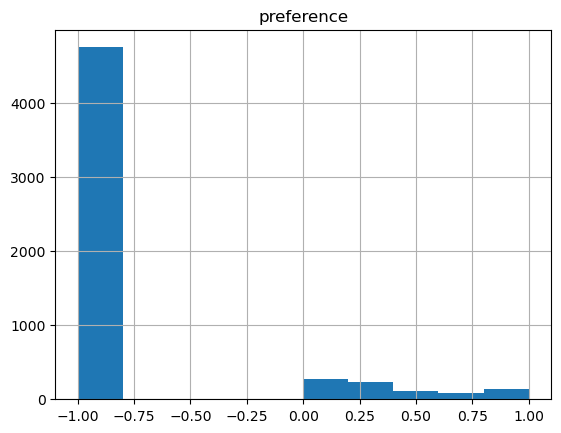

In [126]:
preference_df.hist(column="preference", bins=10)